https://github.com/cblankenback/bus007_final_assignment/invitations


https://www.kaggle.com/datasets/gregorut/videogamesales


# BUS_007 FINAL ASSIGNMENT


## a. Introduction – 1 point (1%)


## b. Description of the Dataset – 2 points (1%) Stef, Kdee

## c. Type of Graphs and observations – 4 points (2%) Stef, Kdee

## d. Descriptive Statistics – 2 points (1%) Measure of Central Tendency (Mean, Median, Mode), Dispersion, Outlier Detection, Missing Values Detection (SAM)

       Area   Genre                               Name Platform  \
0  EU_Sales  Action  .hack: Sekai no Mukou ni + Versus      PS3   
1  EU_Sales  Action                      [Prototype 2]       PC   
2  EU_Sales  Action                      [Prototype 2]      PS3   
3  EU_Sales  Action                      [Prototype 2]     X360   
4  EU_Sales  Action                   1001 Touch Games       DS   

            Publisher  SumofRank  SumofSales  Year  
0  Namco Bandai Games      14279        0.00  2012  
1          Activision      10598        0.02  2012  
2          Activision       2742        0.28  2012  
3          Activision       2576        0.25  2012  
4           Avanquest       5538        0.17  2011  

Mean Sales: 0.12433555379925486
Median Sales: 0.01
Mode Sales: 0    0.0
Name: SumofSales, dtype: float64

Standard Deviation of Sales: 0.4342323507826617
Range of Sales: 15.85

Outliers:
              Area     Genre                                Name Platform  \
2         EU_S

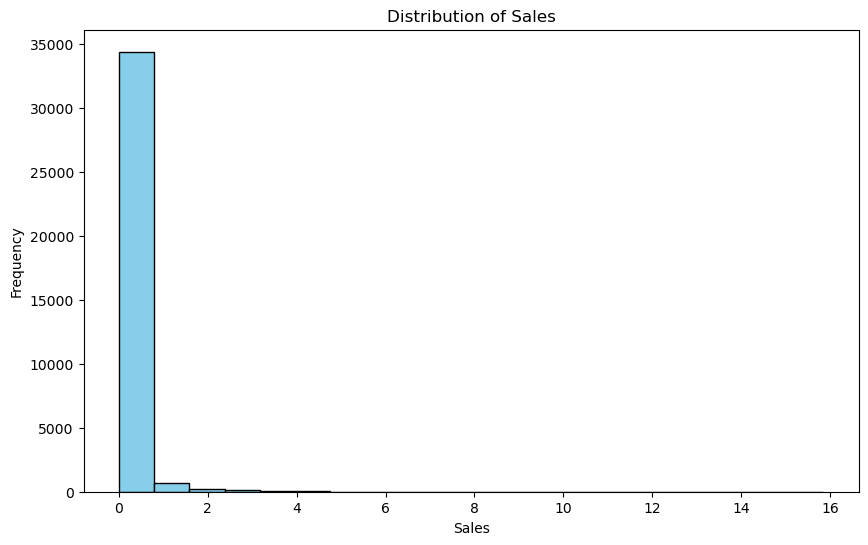

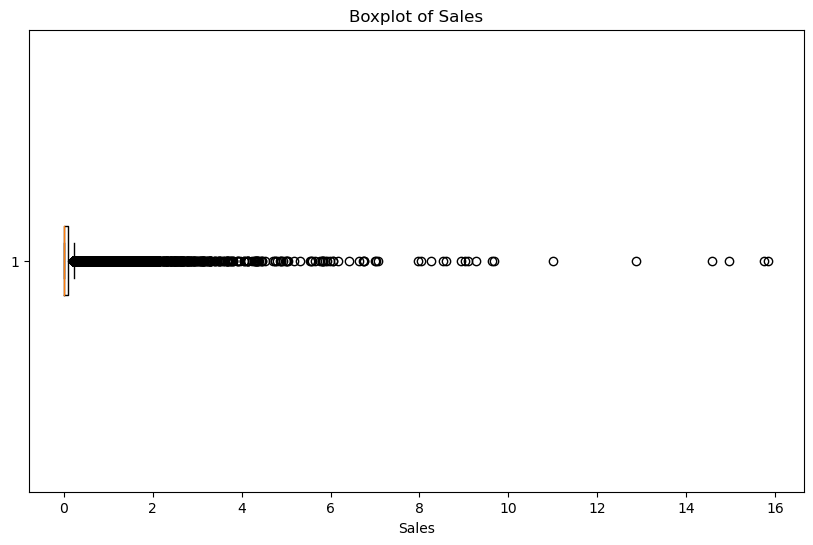

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is in a CSV file named 'video_game_sales.csv'
file_path = 'video_game_data_all.csv'

# Read the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Descriptive Statistics - Measure of Central Tendency
mean_sales = df['SumofSales'].mean()
median_sales = df['SumofSales'].median()
mode_sales = df['SumofSales'].mode()

print(f"\nMean Sales: {mean_sales}")
print(f"Median Sales: {median_sales}")
print(f"Mode Sales: {mode_sales}")

# Dispersion
std_dev_sales = df['SumofSales'].std()
range_sales = df['SumofSales'].max() - df['SumofSales'].min()

print(f"\nStandard Deviation of Sales: {std_dev_sales}")
print(f"Range of Sales: {range_sales}")

# Outlier Detection
Q1 = df['SumofSales'].quantile(0.25)
Q3 = df['SumofSales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['SumofSales'] < lower_bound) | (df['SumofSales'] > upper_bound)]

print("\nOutliers:")
print(outliers)

# Missing Values Detection
missing_values = df.isnull().sum()

print("\nMissing Values:")
print(missing_values)

# Visualizations
# Histogram for Sales Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['SumofSales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Sales Distribution
plt.figure(figsize=(10, 6))
plt.boxplot(df['SumofSales'], vert=False)
plt.title('Boxplot of Sales')
plt.xlabel('Sales')
plt.show()


sns.pairplot(df)

plt.show()

sns.histplot(df.SumofSales)



## e. Predictive Statistics – 4 points (4%) Preprocessing steps, selecting the algorithm (classification, regression, clustering), selecting the evaluation method, results of evaluation. (Christian)

### **CLASSIFICATION**

Companies who make the most money always have an advantage. When developing anything it is important to know about your competition. If you are developing a game that is similar to another game you might want to predict the Genre of that game so you can understand temporal trends and make predictions about future releases.

>**Target Variable (y): "Genre"**

>**Features**


* Area
* Name - removed since rainforest does not work with it
* Platform
* Publisher
* SumofRank
* SumOfSales
* Year





####**Set Up**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### **Reading the data**

In [2]:
df = pd.read_csv('video_game_data_all.csv')
df.head(5)

,Area,Genre,Name,Platform,Publisher,SumofRank,SumofSales,Year
0,EU_Sales,Action,.hack: Sekai no Mukou ni + Versus,PS3,Namco Bandai Games,14279,0.00,2012
1,EU_Sales,Action,[Prototype 2],PC,Activision,10598,0.02,2012
2,EU_Sales,Action,[Prototype 2],PS3,Activision,2742,0.28,2012
3,EU_Sales,Action,[Prototype 2],X360,Activision,2576,0.25,2012
4,EU_Sales,Action,1001 Touch Games,DS,Avanquest,5538,0.17,2011


In [3]:
# check for number of rows
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35428 entries, 0 to 35427
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        35428 non-null  object 
 1   Genre       35428 non-null  object 
 2   Name        35428 non-null  object 
 3   Platform    35428 non-null  object 
 4   Publisher   35388 non-null  object 
 5   SumofRank   35428 non-null  int64  
 6   SumofSales  35428 non-null  float64
 7   Year        35428 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 2.2+ MB
None


**Values are not all equal data cleaning needed**

#### **Data cleaning**

In [4]:
# check the shape of the data before
print(df.shape)

# Drop duplicates
df = df.drop_duplicates()
print(df.shape)

(35428, 8)
(35428, 8)


No duplicates

Lets check to see how many publishers are missing

In [5]:
missing_values_publisher = df['Publisher'].isnull().sum()
print(f"Number of missing values in 'Publisher': {missing_values_publisher}")

Number of missing values in 'Publisher': 40


Since it is a small amount I will replace the missing with 'Unknown' and not drop it

In [6]:
# Replace missing values in the "Publisher" column with "Unknown"
df['Publisher'].fillna('Unknown', inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35428 entries, 0 to 35427
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        35428 non-null  object 
 1   Genre       35428 non-null  object 
 2   Name        35428 non-null  object 
 3   Platform    35428 non-null  object 
 4   Publisher   35428 non-null  object 
 5   SumofRank   35428 non-null  int64  
 6   SumofSales  35428 non-null  float64
 7   Year        35428 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 2.4+ MB


Now all columns are **equal**!

Lets check for outliers

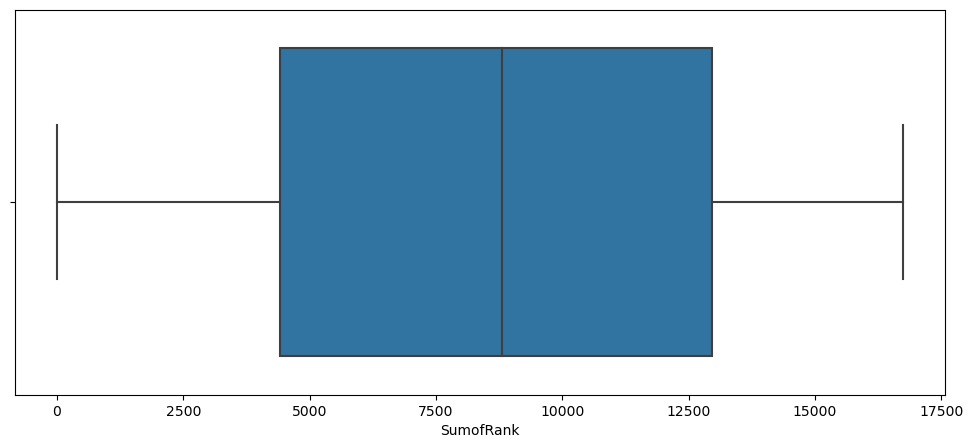

In [8]:
# Plot box plots for numerical columns
fig, axes = plt.subplots(1, figsize=(12, 5))
sns.boxplot(x='SumofRank', data=df)


plt.show()

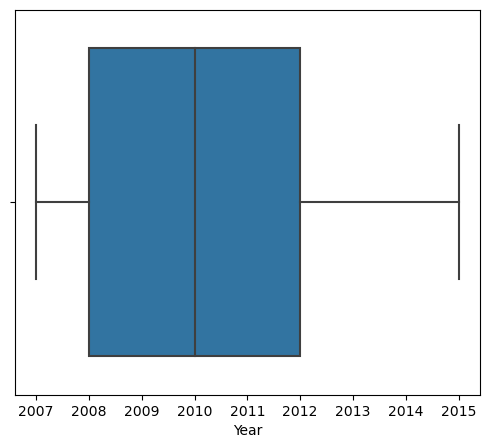

In [9]:
# Plot box plot for the "Year" column
plt.figure(figsize=(6, 5))
sns.boxplot(x='Year', data=df)
plt.show()

In [10]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='SumOfSales', data=df)
plt.show()

ValueError: Could not interpret input 'SumOfSales'

<Figure size 600x500 with 0 Axes>

Does not look like there are any outliers in the first two. In the last one it appears there are outliers. I will try to remove these outliers

In [11]:
# Using a temp varible instead of df
sales_threshold = 3  # or any other threshold based on your analysis
dd = df[df['SumOfSales'] <= sales_threshold]

KeyError: 'SumOfSales'

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='SumOfSales', data=dd)
plt.show()

Still lots of outliers, Random Forest is good at handling outliers so I will keep these outliers.

When doing random rainforest error it comes up with the coloumn 'name' so I will be dropping it

In [14]:
df = df.drop('Name', axis=1)

KeyError: "['Name'] not found in axis"

In [ ]:
# Using a temp varible instead of df
sales_threshold = 1
df = df[df['SumOfSales'] <= sales_threshold]

In [15]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='SumOfSales', data=df)
plt.show()

ValueError: Could not interpret input 'SumOfSales'

<Figure size 600x500 with 0 Axes>

####**Encode**

In [16]:
df = pd.get_dummies(df, columns=['Area', 'Platform', 'Publisher'])

####**Data Partition**

In [17]:
# Features (X) and target variable (y)
X = df.drop('Genre', axis=1)
y = df['Genre']
# Display the first few rows of the input features and target variable
print("Input Features (X):")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())

Input Features (X):
   SumofRank  SumofSales  Year  Area_EU_Sales  Area_JP_Sales  Area_NA_Sales  \
0      14279        0.00  2012              1              0              0   
1      10598        0.02  2012              1              0              0   
2       2742        0.28  2012              1              0              0   
3       2576        0.25  2012              1              0              0   
4       5538        0.17  2011              1              0              0   

   Area_Other_Sales  Platform_3DS  Platform_DC  Platform_DS  ...  \
0                 0             0            0            0  ...   
1                 0             0            0            0  ...   
2                 0             0            0            0  ...   
3                 0             0            0            0  ...   
4                 0             0            0            1  ...   

   Publisher_Zoo Digital Publishing  Publisher_Zoo Games  \
0                                 0 

In [18]:
# splitting the data in training and testing set
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# .2 = 20% used for testing the rest used for training

In [19]:
# Display the distribution of the target variable in the training set
print("\nDistribution of Target Variable in Training Set:")
print(y_train.value_counts(normalize=True))

# Display the distribution of the target variable in the testing set
print("\nDistribution of Target Variable in Testing Set:")
print(y_test.value_counts(normalize=True))

X_train.head()


Distribution of Target Variable in Training Set:
Action          0.230259
Misc            0.124656
Sports          0.120210
Adventure       0.101157
Role-Playing    0.093219
Shooter         0.069790
Simulation      0.060828
Racing          0.053454
Fighting        0.039129
Strategy        0.038741
Puzzle          0.036977
Platform        0.031579
Name: Genre, dtype: float64

Distribution of Target Variable in Testing Set:
Action          0.221564
Misc            0.130821
Sports          0.129975
Adventure       0.103443
Role-Playing    0.097940
Shooter         0.071973
Simulation      0.057014
Racing          0.049252
Fighting        0.037115
Strategy        0.036974
Puzzle          0.035563
Platform        0.028366
Name: Genre, dtype: float64


,SumofRank,SumofSales,Year,Area_EU_Sales,Area_JP_Sales,Area_NA_Sales,Area_Other_Sales,Platform_3DS,Platform_DC,Platform_DS,...,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc"
24072,15936,0.02,2009,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26164,11171,0.00,2009,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5227,6451,0.26,2013,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21442,4837,0.15,2007,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27492,4436,0.19,2009,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Distributions are simular and seem within reason

In [20]:
# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (28342, 372)
Shape of X_test: (7086, 372)
Shape of y_train: (28342,)
Shape of y_test: (7086,)


#### **Models**

####<font color="chocolate">**Random Forest**

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 4: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display a classification report for more detailed metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.48

Classification Report:
              precision    recall  f1-score   support

      Action       0.49      0.57      0.52      1570
   Adventure       0.57      0.53      0.55       733
    Fighting       0.43      0.37      0.40       263
        Misc       0.51      0.49      0.50       927
    Platform       0.27      0.23      0.25       201
      Puzzle       0.46      0.44      0.45       252
      Racing       0.37      0.33      0.35       349
Role-Playing       0.56      0.55      0.56       694
     Shooter       0.42      0.38      0.40       510
  Simulation       0.40      0.35      0.37       404
      Sports       0.49      0.53      0.51       921
    Strategy       0.37      0.34      0.36       262

    accuracy                           0.48      7086
   macro avg       0.45      0.43      0.43      7086
weighted avg       0.48      0.48      0.48      7086



Lets test it should get it right 50% of the time

In [22]:
new = df.drop('Genre', axis=1).iloc[5000:5001]

print(df.loc[5000, 'Genre'])

Action


In [23]:


# Make predictions for the new game
new_game_prediction = rf_model.predict(new)

# Display the predicted genre for the new game
print(f'Predicted Genre for the New Game: {new_game_prediction[0]}')

Predicted Genre for the New Game: Action


As you can see it was right!

####<font color="chocolate">**Logistic Regression**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)  # You can adjust max_iter based on your data
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

print(f'Accuracy of Logistic Regression: {accuracy_logistic:.2f}\n')

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))

Accuracy of Logistic Regression: 0.23

Classification Report:
              precision    recall  f1-score   support

      Action       0.23      0.85      0.36      1570
   Adventure       0.25      0.44      0.32       733
    Fighting       0.00      0.00      0.00       263
        Misc       0.00      0.00      0.00       927
    Platform       0.00      0.00      0.00       201
      Puzzle       0.00      0.00      0.00       252
      Racing       0.00      0.00      0.00       349
Role-Playing       0.00      0.00      0.00       694
     Shooter       0.00      0.00      0.00       510
  Simulation       0.00      0.00      0.00       404
      Sports       0.00      0.00      0.00       921
    Strategy       0.00      0.00      0.00       262

    accuracy                           0.23      7086
   macro avg       0.04      0.11      0.06      7086
weighted avg       0.08      0.23      0.11      7086


Confusion Matrix:
[[1340  230    0    0    0    0    0    0    0    0 

This one only 23% accurate

### **REGRESSION**

Predicting future sales is critical for businesses as it provides essential insights for effective planning and decision-making. Accurate sales forecasts facilitate demand planning, allowing businesses to optimize inventory levels, allocate resources efficiently, and make informed financial decisions.

>**Target Variable (y): "SumOfSales"**

>**Features**


* Area
* Genre
* Platform
* Publisher
* SumofRank
* Year

In [ ]:
sales_threshold = 1 # or any other threshold based on your analysis USED IN OUTLIER

####**Step Up**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### **Reading the data**

In [ ]:
df = pd.read_csv('video_game_data_all.csv')
df.head(5)

,Area,Genre,Name,Platform,Publisher,SumofRank,SumOfSales,Year
0,EU_Sales,Action,.hack: Sekai no Mukou ni + Versus,PS3,Namco Bandai Games,14279,0.00,2012
1,EU_Sales,Action,[Prototype 2],PC,Activision,10598,0.02,2012
2,EU_Sales,Action,[Prototype 2],PS3,Activision,2742,0.28,2012
3,EU_Sales,Action,[Prototype 2],X360,Activision,2576,0.25,2012
4,EU_Sales,Action,1001 Touch Games,DS,Avanquest,5538,0.17,2011


In [ ]:
# check for number of rows
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35428 entries, 0 to 35427
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        35428 non-null  object 
 1   Genre       35428 non-null  object 
 2   Name        35428 non-null  object 
 3   Platform    35428 non-null  object 
 4   Publisher   35388 non-null  object 
 5   SumofRank   35428 non-null  int64  
 6   SumOfSales  35428 non-null  float64
 7   Year        35428 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 2.2+ MB
None


**Values are not all equal data cleaning needed**

#### **Data cleaning**

In [ ]:
# check the shape of the data before
print(df.shape)

# Drop duplicates
df = df.drop_duplicates()
print(df.shape)

(35428, 8)
(35428, 8)


No duplicates

Lets check to see how many publishers are missing

In [ ]:
missing_values_publisher = df['Publisher'].isnull().sum()
print(f"Number of missing values in 'Publisher': {missing_values_publisher}")

Number of missing values in 'Publisher': 40


Since it is a small amount I will replace the missing with 'Unknown' and not drop it

In [ ]:
# Replace missing values in the "Publisher" column with "Unknown"
df['Publisher'].fillna('Unknown', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35428 entries, 0 to 35427
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        35428 non-null  object 
 1   Genre       35428 non-null  object 
 2   Name        35428 non-null  object 
 3   Platform    35428 non-null  object 
 4   Publisher   35428 non-null  object 
 5   SumofRank   35428 non-null  int64  
 6   SumOfSales  35428 non-null  float64
 7   Year        35428 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 2.4+ MB


Now all columns are **equal**!

Linear does not need 'Name' so I will drop it

In [ ]:
df.drop('Name', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35428 entries, 0 to 35427
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        35428 non-null  object 
 1   Genre       35428 non-null  object 
 2   Platform    35428 non-null  object 
 3   Publisher   35428 non-null  object 
 4   SumofRank   35428 non-null  int64  
 5   SumOfSales  35428 non-null  float64
 6   Year        35428 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.2+ MB


Lets check for outliers

####**Outliers**

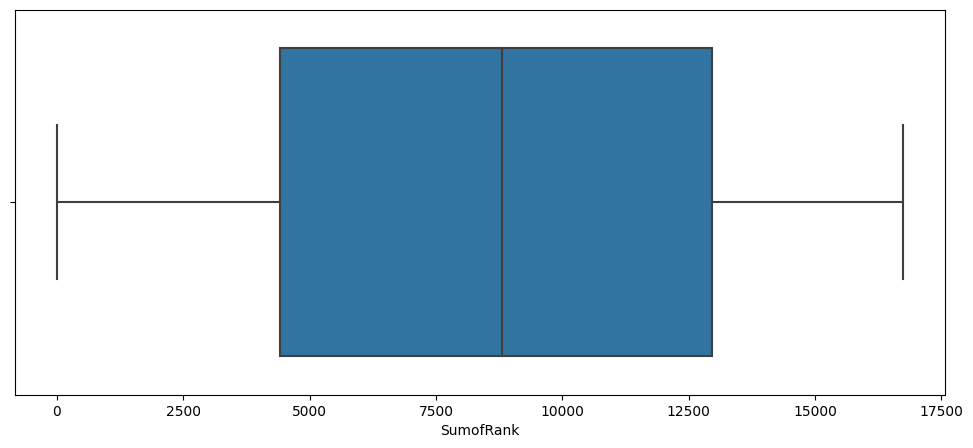

In [ ]:
# Plot box plots for numerical columns
fig, axes = plt.subplots(1, figsize=(12, 5))
sns.boxplot(x='SumofRank', data=df)


plt.show()

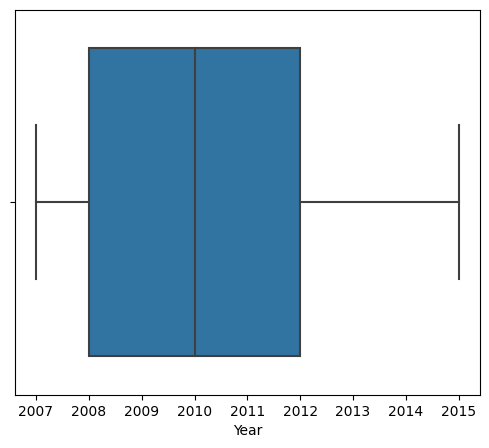

In [ ]:
# Plot box plot for the "Year" column
plt.figure(figsize=(6, 5))
sns.boxplot(x='Year', data=df)
plt.show()

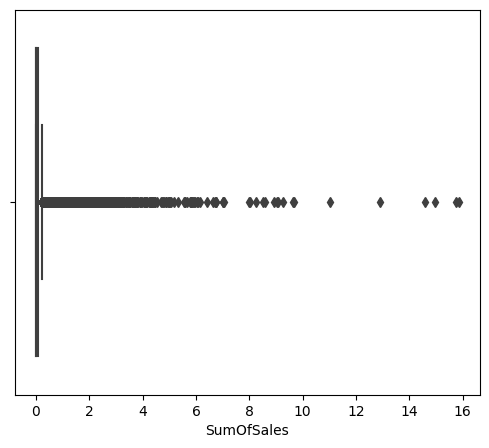

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='SumOfSales', data=df)
plt.show()

Does not look like there are any outliers in the first two. In the last one it appears there are outliers. I will try to remove these outliers

In [ ]:
# Using a temp varible instead of df
# Sales_threshold is at the top of this section to make it easier to test
df = df[df['SumOfSales'] <= sales_threshold]

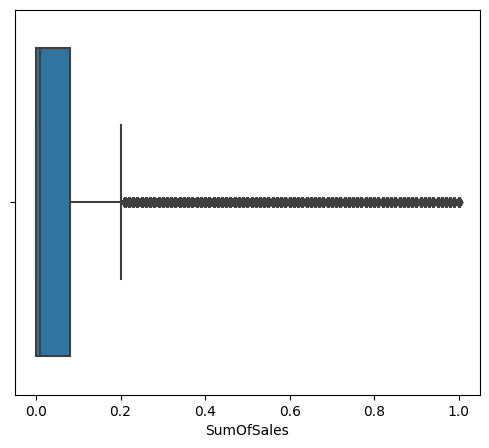

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='SumOfSales', data=df)
plt.show()

####**Encode**

In [ ]:
df = pd.get_dummies(df, columns=['Genre','Area', 'Platform', 'Publisher'])
print(df.head())
print(df.info())

   SumofRank  SumOfSales  Year  Genre_Action  Genre_Adventure  Genre_Fighting  \
0      14279        0.00  2012             1                0               0   
1      10598        0.02  2012             1                0               0   
2       2742        0.28  2012             1                0               0   
3       2576        0.25  2012             1                0               0   
4       5538        0.17  2011             1                0               0   

   Genre_Misc  Genre_Platform  Genre_Puzzle  Genre_Racing  ...  \
0           0               0             0             0  ...   
1           0               0             0             0  ...   
2           0               0             0             0  ...   
3           0               0             0             0  ...   
4           0               0             0             0  ...   

   Publisher_Zoo Digital Publishing  Publisher_Zoo Games  \
0                                 0                    0

####**Feature Selection/Target Variable**

In [ ]:
# Features: Include one-hot encoded columns, 'SumofRank', 'Year'
features = df[['SumofRank', 'Year'] + [col for col in df.columns if col.startswith('Genre_') or col.startswith('Area_') or col.startswith('Platform_') or col.startswith('Publisher_')]]

# Target: 'SumOfSales'
target = df['SumOfSales']


####**Model**

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create and train the linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.0139201601984153
R-squared: 0.3930343058629038


####**Visualization**

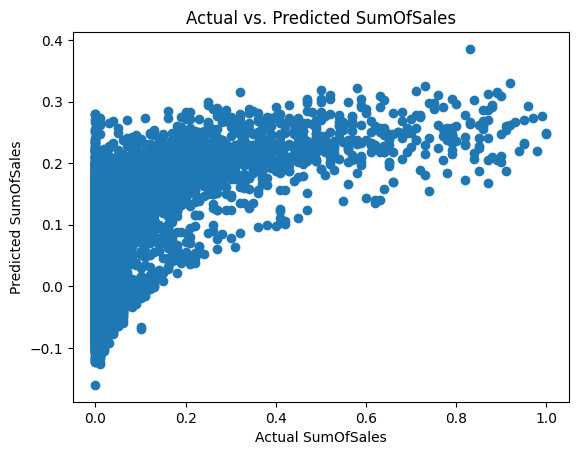

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual SumOfSales")
plt.ylabel("Predicted SumOfSales")
plt.title("Actual vs. Predicted SumOfSales")
plt.show()

### **CLUSTERING**

Clusters to inform decisions about new product development. Understanding the preferences of each cluster can guide decisions about what features or genres to focus on.

####**Step Up**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### **Reading the data**

In [ ]:
df = pd.read_csv('video_game_data_all.csv')
df.head(5)

,Area,Genre,Name,Platform,Publisher,SumofRank,SumOfSales,Year
0,EU_Sales,Action,.hack: Sekai no Mukou ni + Versus,PS3,Namco Bandai Games,14279,0.00,2012
1,EU_Sales,Action,[Prototype 2],PC,Activision,10598,0.02,2012
2,EU_Sales,Action,[Prototype 2],PS3,Activision,2742,0.28,2012
3,EU_Sales,Action,[Prototype 2],X360,Activision,2576,0.25,2012
4,EU_Sales,Action,1001 Touch Games,DS,Avanquest,5538,0.17,2011


In [ ]:
# check for number of rows
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35428 entries, 0 to 35427
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        35428 non-null  object 
 1   Genre       35428 non-null  object 
 2   Name        35428 non-null  object 
 3   Platform    35428 non-null  object 
 4   Publisher   35388 non-null  object 
 5   SumofRank   35428 non-null  int64  
 6   SumOfSales  35428 non-null  float64
 7   Year        35428 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 2.2+ MB
None


####**Model**

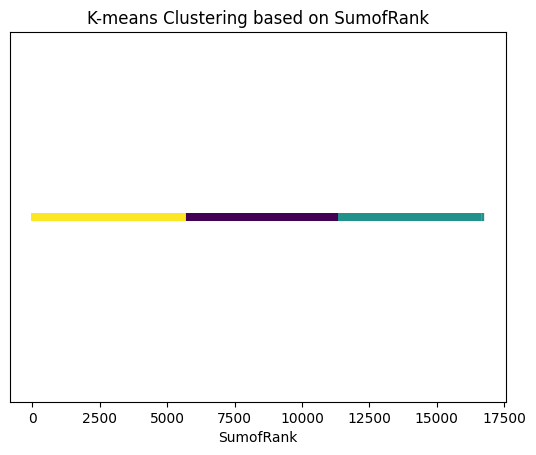

In [ ]:
# Assuming your data is in a DataFrame named 'df'
# Selecting the feature for clustering
X = df[['SumofRank']]

# Specify the number of clusters (you can adjust this based on your problem)
num_clusters = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Add cluster labels to the original DataFrame
df['Cluster_SumofRank'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df['SumofRank'], [0] * len(df), c=df['Cluster_SumofRank'], cmap='viridis', marker='|')
plt.title('K-means Clustering based on SumofRank')
plt.xlabel('SumofRank')
plt.yticks([])
plt.show()

In [ ]:
cluster_analysis = df.groupby('Cluster_SumofRank').mean()
print(cluster_analysis)

                      SumofRank  SumOfSales         Year
Cluster_SumofRank                                       
0                   8591.326319    0.042946  2010.099345
1                  14090.975073    0.009654  2010.304306
2                   2895.416870    0.330052  2010.127571


* **Cluster 0:**

Moderate "SumofRank" and "SumOfSales."
Games in this cluster seem to have a decent ranking, moderate sales, and are from around 2010.
* **Cluster 1:**

High "SumofRank" but very low "SumOfSales."
Games in this cluster have high rankings but low sales. The average year is slightly later than Cluster 0.
* **Cluster 2:**

Low "SumofRank" and high "SumOfSales."
Games in this cluster have lower rankings but higher sales, and they are from around 2010.

## f. Conclusion and Recommendations – 2 points (1%)